In [1]:
import requests
import pandas as pd
from env import api_key
import os

In [2]:
# api key
api_key='6yjdBmdV4mhSq0OXeFOdiprdUU8QiZs6haPp2Tyg'
# url
url = f'https://api.govinfo.gov/collections/BILLS/2001-01-01T01%3A01%3A01Z?offset=0&pageSize=1000&offsetMark=%2A&api_key={api_key}'
# set response variable
response = requests.get(url)
# is it ok
response.ok

True

In [3]:
# make json then call json
json = response.json()
json

{'count': 247991,
 'message': None,
 'nextPage': 'https://api.govinfo.gov/collections/BILLS/2001-01-01T01:01:01Z?offsetMark=AoJ43p6WrYYDMEJJTExTLTExOGhyNTg5aWg%3D&pageSize=1000',
 'previousPage': None,
 'packages': [{'packageId': 'BILLS-118hr971ih',
   'lastModified': '2023-03-13T15:59:23Z',
   'packageLink': 'https://api.govinfo.gov/packages/BILLS-118hr971ih/summary',
   'docClass': 'hr',
   'title': 'Black History Matters Act',
   'congress': '118',
   'dateIssued': '2023-02-09'},
  {'packageId': 'BILLS-118hr970ih',
   'lastModified': '2023-03-13T15:59:18Z',
   'packageLink': 'https://api.govinfo.gov/packages/BILLS-118hr970ih/summary',
   'docClass': 'hr',
   'title': 'Preserving the Gulf Test Range to Ensure Military Readiness Act',
   'congress': '118',
   'dateIssued': '2023-02-09'},
  {'packageId': 'BILLS-118hr1131ih',
   'lastModified': '2023-03-13T15:59:18Z',
   'packageLink': 'https://api.govinfo.gov/packages/BILLS-118hr1131ih/summary',
   'docClass': 'hr',
   'title': 'To req

In [4]:
# URL of the API endpoint
api_key='6yjdBmdV4mhSq0OXeFOdiprdUU8QiZs6haPp2Tyg'
url = f'https://api.govinfo.gov/collections/BILLS/2001-01-01T01%3A01%3A01Z?offset=0&pageSize=1000&offsetMark=%2A&api_key={api_key}'


# Parameters for the API request
params = {
    'offset': 0,
    'pageSize': 1000,
    'api_key': api_key # Replace with your own API key
}

# Make a request to the API
response = requests.get(url, params=params)

# Convert the response to JSON
data = response.json()

# Print the bill links
for result in data['packages']:
    print(result['packageLink'])


https://api.govinfo.gov/packages/BILLS-118hr971ih/summary
https://api.govinfo.gov/packages/BILLS-118hr970ih/summary
https://api.govinfo.gov/packages/BILLS-118hr1131ih/summary
https://api.govinfo.gov/packages/BILLS-118hr961ih/summary
https://api.govinfo.gov/packages/BILLS-118hr1084ih/summary
https://api.govinfo.gov/packages/BILLS-118hr1051ih/summary
https://api.govinfo.gov/packages/BILLS-118hr1143ih/summary
https://api.govinfo.gov/packages/BILLS-118hr1101ih/summary
https://api.govinfo.gov/packages/BILLS-118hr1095ih/summary
https://api.govinfo.gov/packages/BILLS-118hr1093ih/summary
https://api.govinfo.gov/packages/BILLS-118hr1082ih/summary
https://api.govinfo.gov/packages/BILLS-118hr1102ih/summary
https://api.govinfo.gov/packages/BILLS-118hr1104ih/summary
https://api.govinfo.gov/packages/BILLS-118hr1098ih/summary
https://api.govinfo.gov/packages/BILLS-118hr1081ih/summary
https://api.govinfo.gov/packages/BILLS-118hr1054ih/summary
https://api.govinfo.gov/packages/BILLS-118hr965ih/summary
h

In [5]:
# make bill df
# rerun this for dataframe
# bill_df = pd.DataFrame(data['packages'])


In [6]:
# create empty list
links_list = []
# for loop to get all links and append to empty list
for result in data['packages']:
    links_list.append(result['packageLink'])

In [7]:
# get first link in new links list
url = links_list[0]
# response variable
response = requests.get(url, params=params)
response.text

'{\n    "originChamber": "HOUSE",\n    "references": [{\n        "contents": [{\n            "label": "U.S.C",\n            "title": "20",\n            "sections": ["7801"]\n        }],\n        "collectionCode": "USCODE",\n        "collectionName": "U.S. Code"\n    }],\n    "congress": "118",\n    "session": "1",\n    "detailsLink": "https://www.govinfo.gov/app/details/BILLS-118hr971ih",\n    "shortTitle": [{\n        "type": "measure",\n        "title": "Black History Matters Act"\n    }],\n    "isPrivate": "false",\n    "title": "To direct the Director of the National Museum of African American History and Culture to conduct a study on Black history education efforts in public elementary and secondary schools, and for other purposes.",\n    "branch": "legislative",\n    "isAppropriation": "false",\n    "collectionName": "Congressional Bills",\n    "download": {\n        "premisLink": "https://api.govinfo.gov/packages/BILLS-118hr971ih/premis",\n        "xmlLink": "https://api.govinfo

In [8]:
# url for text link in bill summary from first link in links list
url = "https://api.govinfo.gov/packages/BILLS-118hr1029ih/htm"
    
# response variable    
response = requests.get(url, params=params)
# call response content
response.content

b"<html><body><pre>\n[Congressional Bills 118th Congress]\n[From the U.S. Government Publishing Office]\n[H.R. 1029 Introduced in House (IH)]\n\n&lt;DOC&gt;\n\n\n\n\n\n\n118th CONGRESS\n  1st Session\n                                H. R. 1029\n\n   To amend titles XVIII and XIX of the Social Security Act to make \n improvements to the treatment of the United States territories under \n      the Medicare and Medicaid programs, and for other purposes.\n\n\n_______________________________________________________________________\n\n\n                    IN THE HOUSE OF REPRESENTATIVES\n\n                           February 14, 2023\n\n   Ms. Plaskett (for herself, Mrs. Gonzalez-Colon, Mr. Moylan, Mrs. \n   Radewagen, Mr. Sablan, Ms. Clarke of New York, Mr. Grijalva, Ms. \n    Pressley, Mr. Soto, Mr. Torres of New York, and Ms. Velazquez) \n introduced the following bill; which was referred to the Committee on \n   Energy and Commerce, and in addition to the Committee on Ways and \n Means,

In [9]:
from bs4 import BeautifulSoup

def scrape_links(links_list):
    for link in links_list:
        # Make a request to the link and retrieve the HTML content
        response = requests.get(link, params=params)
        html_content = response.content
        
        # Parse the HTML content using BeautifulSoup
        soup = BeautifulSoup(html_content, 'html.parser')
        
        # Find all the tex t on the page and print it
        page_text = soup.get_text()
        print(page_text)

In [10]:
# bill_summary = scrape_links(links_list)
# bill_summary

In [11]:
import pandas as pd
import numpy as np
from env import api_key
import requests
import json

def get_links_to_bills():
    """
    This function gets the links to the full text of bills from the gov info api.
    """
    #Builds the url using your api key.
    url = f"http://api.govinfo.gov/collections/BILLS/2001-01-01T01%3A01%3A01Z/2023-01-01T01%3A01%3A01Z?pageSize=1000&offsetMark=%2A{api_key}"
    
    #Gets each page
    response = requests.get(url)
    
    #Converts from json
    data = response.json()
    
    #Makes list to collect links
    bill_links = []
    
    #Loop to collect links from first page
    for item in data['packages']:
        bill_links.append(item['packageLink'])
        
    #Sets the variable to break the while loop
    next_page = data['nextPage']
    
    #While loop to collect the remaining links
    while next_page != None: #first json coming in, next_page url coming in.

        nextPage_link = next_page + api_key #Creates new url 
        response = requests.get(nextPage_link) #Gets new info
        data = response.json() #Makes new info readable
        next_page = data['nextPage'] #nextpage link assigned

        for item in data['packages']:
            bill_links.append(item['packageLink'])
            
    return bill_links

In [12]:
bill_links = get_links_to_bills()

In [13]:
pd.Series(bill_links).to_csv("links_to_summary.csv")

In [14]:
bill_links[:1]

['https://api.govinfo.gov/packages/BILLS-116hr5273rh/summary']

In [15]:
# Parameters for the API request
params = {
    'offset': 0,
    'pageSize': 1000,
    'api_key': f'{api_key[9:]}'} # Replace with your own API key

In [16]:
# Make a request to the API
response = requests.get(bill_links[0], params=params)

In [17]:
# Convert the response to JSON
data = response.json()
data

{'originChamber': 'HOUSE',
 'references': [{'contents': [{'label': 'U.S.C',
     'title': '15',
     'sections': ['632']}],
   'collectionCode': 'USCODE',
   'collectionName': 'U.S. Code'}],
 'congress': '116',
 'session': '2',
 'detailsLink': 'https://www.govinfo.gov/app/details/BILLS-116hr5273rh',
 'shortTitle': [{'type': 'measure', 'title': 'Securing America’s Ports Act'}],
 'isPrivate': 'false',
 'title': 'To require the Secretary of Homeland Security to develop a plan to increase to 100 percent the rates of scanning of commercial and passenger vehicles entering the United States at land ports of entry along the border using large-scale non-intrusive inspection systems to enhance border security, and for other purposes.',
 'branch': 'legislative',
 'isAppropriation': 'false',
 'collectionName': 'Congressional Bills',
 'download': {'premisLink': 'https://api.govinfo.gov/packages/BILLS-116hr5273rh/premis',
  'xmlLink': 'https://api.govinfo.gov/packages/BILLS-116hr5273rh/xml',
  'txtL

In [18]:
member = data['members'][0]['memberName']
member

'Torres Small, Xochitl'

In [19]:
party = data['members'][0]['party']
party

'D'

In [20]:
link_to_bill = data['download']['txtLink']
link_to_bill

'https://api.govinfo.gov/packages/BILLS-116hr5273rh/htm'

In [21]:
response = requests.get(link_to_bill, params=params)

In [22]:
#pd.read_html(response.text)

In [23]:
# Make a soup variable holding the response content
soup = BeautifulSoup(response.text, 'html.parser')
soup

<html><body><pre>
[Congressional Bills 116th Congress]
[From the U.S. Government Publishing Office]
[H.R. 5273 Reported in House (RH)]

&lt;DOC&gt;





                                                 Union Calendar No. 317
116th CONGRESS
  2d Session
                                H. R. 5273

                          [Report No. 116-394]

  To require the Secretary of Homeland Security to develop a plan to 
    increase to 100 percent the rates of scanning of commercial and 
 passenger vehicles entering the United States at land ports of entry 
along the border using large-scale non-intrusive inspection systems to 
            enhance border security, and for other purposes.


_______________________________________________________________________


                    IN THE HOUSE OF REPRESENTATIVES

                           November 26, 2019

     Ms. Torres Small of New Mexico (for herself and Mr. Crenshaw) 
 introduced the following bill; which was referred to the Committee o

In [24]:
text_of_bill = soup.select('body')

In [25]:
pd.Series(text_of_bill).to_csv("testy_test_test.csv")

In [26]:
tests = pd.read_csv("testy_test_test.csv")

In [27]:
pd.options.display.max_colwidth

50

In [28]:
tests['0'][0]

"<body><pre>\n[Congressional Bills 116th Congress]\n[From the U.S. Government Publishing Office]\n[H.R. 5273 Reported in House (RH)]\n\n&lt;DOC&gt;\n\n\n\n\n\n                                                 Union Calendar No. 317\n116th CONGRESS\n  2d Session\n                                H. R. 5273\n\n                          [Report No. 116-394]\n\n  To require the Secretary of Homeland Security to develop a plan to \n    increase to 100 percent the rates of scanning of commercial and \n passenger vehicles entering the United States at land ports of entry \nalong the border using large-scale non-intrusive inspection systems to \n            enhance border security, and for other purposes.\n\n\n_______________________________________________________________________\n\n\n                    IN THE HOUSE OF REPRESENTATIVES\n\n                           November 26, 2019\n\n     Ms. Torres Small of New Mexico (for herself and Mr. Crenshaw) \n introduced the following bill; which was

In [29]:
tests.head()

,Unnamed: 0,0
0,0,<body><pre>\n[Congressional Bills 116th Congre...


In [30]:
#print(text_of_bill)

In [31]:
#response.text

In [34]:
bill_link_list = get_links_to_bills()

In [55]:

links = bill_link_list[16000:23000]

In [56]:
params = {
    'offset': 0,
    'pageSize': 1000,
    'api_key': f'{api_key[9:]}'}

In [57]:
master_list = []

In [58]:
i = 0

In [62]:
for link in links:
    try:
        #Get the summary data
        response = requests.get(link, params=params)
        data = response.json()

        #Primary sponsor
        member = data['members'][0]['memberName']
        #Party affiliation
        party = data['members'][0]['party']

        #Getting text of bill
        link_to_bill = data['download']['txtLink']
        response = requests.get(link_to_bill, params=params)

        # Make a soup variable holding the response content
        soup = BeautifulSoup(response.text, 'html.parser')
        text_of_bill = soup.find('body')

        #Create a dictionary of the items and append to a list
        temp_dictionary = {"sponsor":member,
                       "party":party,
                       "bill_text":text_of_bill}
        master_list.append(temp_dictionary)
        
        i += 1
        if i % 100 == 0:
            print(f'{i}')
    except KeyError:
        pass

3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500


KeyboardInterrupt: 

In [63]:
type(master_list)

list

In [64]:
middle_chunk = pd.DataFrame(master_list)
middle_chunk

,sponsor,party,bill_text
0,"Rice, Tom",R,[[\n[Congressional Bills 117th Congress]\n[Fro...
1,"Ruiz, Raul",D,[[\n[Congressional Bills 117th Congress]\n[Fro...
2,"Ruiz, Raul",D,[[\n[Congressional Bills 117th Congress]\n[Fro...
3,"Sanchez, Linda T.",D,[[\n[Congressional Bills 117th Congress]\n[Fro...
4,"Ruiz, Raul",D,[[\n[Congressional Bills 117th Congress]\n[Fro...
...,...,...,...
7499,"Warnock, Raphael G.",D,[[\n[Congressional Bills 117th Congress]\n[Fro...
7500,"Blumenthal, Richard",D,[[\n[Congressional Bills 117th Congress]\n[Fro...
7501,"Manchin, Joe, III",D,[[\n[Congressional Bills 117th Congress]\n[Fro...
7502,"Peters, Gary C.",D,[[\n[Congressional Bills 117th Congress]\n[Fro...


In [80]:
duplicated_df = middle_chunk[middle_chunk.duplicated()]

<AxesSubplot:xlabel='party', ylabel='count'>

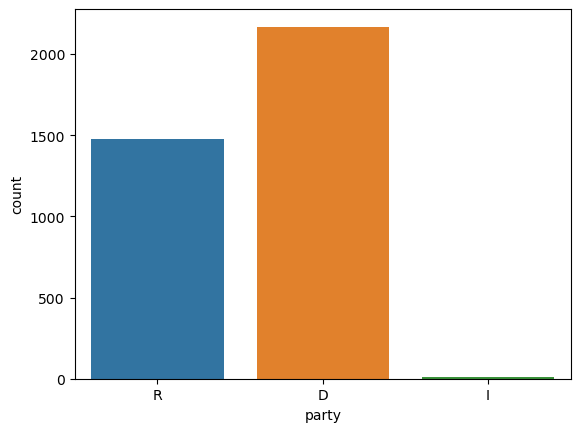

In [81]:
import seaborn as sns

sns.countplot(data= duplicated_df, x= 'party')

In [87]:
master_df = pd.read_csv('master_df.csv')

In [109]:
master_df.sample(20)

,sponsor,party,bill_text
13873,"Sasse, Ben",R,<body><pre>\n[Congressional Bills 117th Congre...
19879,"Wicker, Roger F.",R,<body><pre>\n[Congressional Bills 117th Congre...
5714,"Gianforte, Greg",R,<body><pre>\n[Congressional Bills 116th Congre...
20998,"Weber, Randy K., Sr.",R,<body><pre>\n[Congressional Bills 117th Congre...
17807,"Hill, J. French",R,<body><pre>\n[Congressional Bills 117th Congre...
24401,"Velazquez, Nydia M.",D,<body><pre>\n[Congressional Bills 117th Congre...
14250,"McKinley, David B.",R,<body><pre>\n[Congressional Bills 117th Congre...
7646,"Ryan, Patrick",D,<body><pre>\n[Congressional Bills 117th Congre...
12192,"Good, Bob",R,<body><pre>\n[Congressional Bills 117th Congre...
14053,"Cardin, Benjamin L.",D,<body><pre>\n[Congressional Bills 117th Congre...


In [101]:
import pandas as pd
import numpy as np
from typing import Dict, List, Optional, Union, cast
from bs4 import BeautifulSoup
import os
from sklearn.model_selection import train_test_split
import requests
import nltk
import unicodedata
import re




def prep_bills(df):
    '''Prepares acquired world bills data for exploration'''
    
    new_df = df.loc[df['bill_text'].str.len() >= 35]
    
    return new_df

def clean_text(text, extra_stopwords=[]):

    '''
    This function takes in the words and cleans it, and returns the words that have been 
    lemmatized.
    '''

    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + extra_stopwords
    clean_text = (unicodedata.normalize('NFKD', text)
                   .encode('ascii', 'ignore')
                   .decode('utf-8', 'ignore')
                   .lower())
    words = re.sub(r'[\n]', '', clean_text)
    words = re.sub(r'[^\w\s___]', '', clean_text).split()
    words = re.sub(r'_', '',' '.join(words)).split(' ')
    words = [w for w in words if len(w)<25]
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

<AxesSubplot:xlabel='party', ylabel='count'>

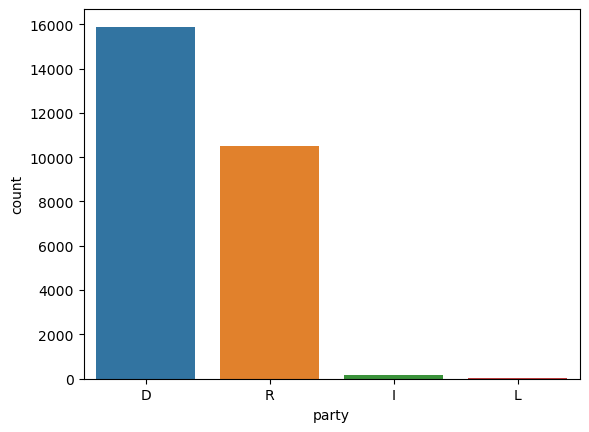

In [89]:
sns.countplot(data= master_df, x= 'party')

In [213]:
def prepare_bills_for_processing(df):
    """
    Combines single line code and functions to prepare the data.
    """
    #Removes a bill with no text
    df = df[df.bill_text != "None"]
    df.bill_text = df.bill_text.apply(bill_trimmer)
    return df
    
def bill_trimmer(input_string):
    """
    This function looks at bills and removes everything above 'A BILL' or 'RESOLUTION' or 'AN ACT'.
    """
    #Identifies the position of 'A BILL'
    text_pos = re.split('(A BILL|RESOLUTION|AN ACT)', input_string, 1)
    output_string = text_pos[2]
    return output_string

def prep_bills(df):
    '''Prepares acquired world bills data for exploration'''
    
    new_df = df.loc[df['bill_text'].str.len() >= 35]
    
    return new_df

def clean_text(text, extra_stopwords=[]):

    '''
    This function takes in the words and cleans it, and returns the words that have been 
    lemmatized.
    '''

    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + extra_stopwords
    clean_text = (unicodedata.normalize('NFKD', text)
                   .encode('ascii', 'ignore')
                   .decode('utf-8', 'ignore')
                   .lower())
    words = re.sub(r'[\n]', '', clean_text)
    words = re.sub(r'[^\w\s___]', '', clean_text).split()
    words = re.sub(r'_', '',' '.join(words)).split(' ')
    words = [w for w in words if len(w)<25]
    return [wnl.lemmatize(word) for word in words if word not in stopwords]


def join(col):
    return ' '.join(col)

def split_data(df, target):
    
    '''
    Splits a df into a train, validate, and test set. 
    target is the feature you will predict
    '''
    full = df
    train_validate, test = train_test_split(df, train_size =.8, random_state = 21)
    train, validate = train_test_split(train_validate, train_size = .7, random_state = 21)
    X_train = train.drop(columns=target)
    y_train = train[target]
    X_val = validate.drop(columns=target)
    y_val = validate[target]
    X_test = test.drop(columns=target)
    y_test = test[target]
    
    
    return train, X_train, y_train, X_val, y_val, X_test, y_test

In [216]:
prep_df = prepare_bills_for_processing(master_df)
prep_df

/var/folders/9q/slnrpghs0r78mkz6d7_q_hj40000gp/T/ipykernel_52416/2896642467.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.bill_text = df.bill_text.apply(bill_trimmer)


,sponsor,party,bill_text
0,"Torres Small, Xochitl",D,\n\n\n \n To require the Secretary of Homelan...
1,"Sewell, Terri A.",D,\n\n\n \nTo amend title XI of the Social Secur...
2,"Finkenauer, Abby",D,\n\n\n \n To repeal the funding authorization ...
3,"Casten, Sean",D,\n\n\n \nTo direct the Federal Energy Regulato...
4,"LaMalfa, Doug",R,\n\n\n \n To establish a categorical exclusio...
...,...,...,...
26529,"McGovern, James P.",D,\n\n\n \nTo impose sanctions on persons respon...
26530,"Gerlach, Jim",R,\n\n\n \n To suspend temporarily the ...
26531,"Luetkemeyer, Blaine",R,\n\n\n \n To reduce temporarily the duty on...
26532,"Luetkemeyer, Blaine",R,\n\n\n \n To modify and extend the temporary r...
